In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузим данные

In [59]:
from sklearn.datasets import make_classification, load_boston

data = load_boston()
X, y = data.data, data.target

### Валидация на отложенной выборке (Holdout)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr = LinearRegression()
regr.fit(X_train, y_train)
preds = regr.predict(X_test)

print(mean_squared_error(y_test, preds))

23.9253699751


### Проверим дисперсию!

26.9259653249
6.38763314478


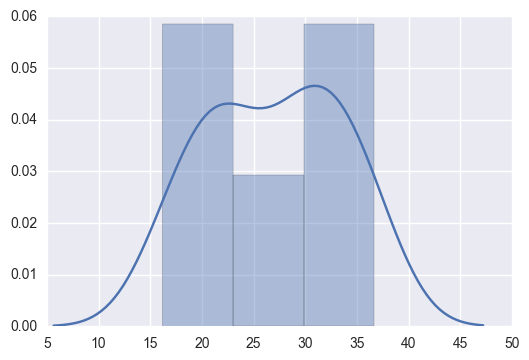

In [97]:
def evaluate():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regr.fit(X_train, y_train)
    preds = regr.predict(X_test)
    
    return mean_squared_error(y_test, preds)

scores = [evaluate() for _ in range(20)]

sns.distplot(scores)
print(np.mean(scores))
print(np.std(scores))

### KFold валидация

In [100]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr, X, y, scoring="neg_mean_squared_error", cv=5)
print(-scores.mean())

37.2228436371


37.2228436371
7.1054273576e-15


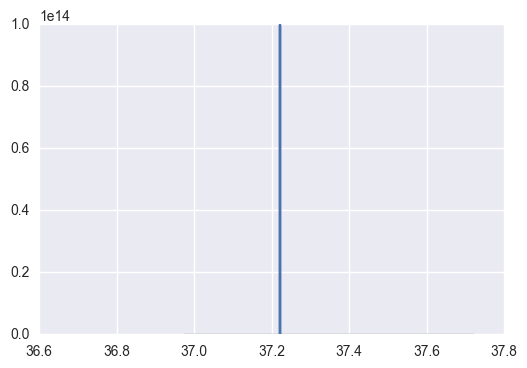

In [103]:
def evaluate():
    return -cross_val_score(regr, X, y, scoring="neg_mean_squared_error", cv=5).mean()
scores = [evaluate() for _ in range(20)]

sns.distplot(scores)
print(np.mean(scores))
print(np.std(scores))

### Stratified KFold

In [124]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

X_class, y_class = make_classification(n_samples=100000)
clf = GaussianNB()

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X_class, y_class, scoring="accuracy", cv=cv)
print(scores.mean())

0.930309991432


### Group KFold

In [138]:
from sklearn.model_selection import GroupKFold

groups = np.random.randint(0, 2000, size=y_class.shape)
group_cv = GroupKFold(n_splits=5)

print(cross_val_score(clf, X_class, y_class, groups=groups, scoring="accuracy", cv=group_cv).mean())

0.93041
